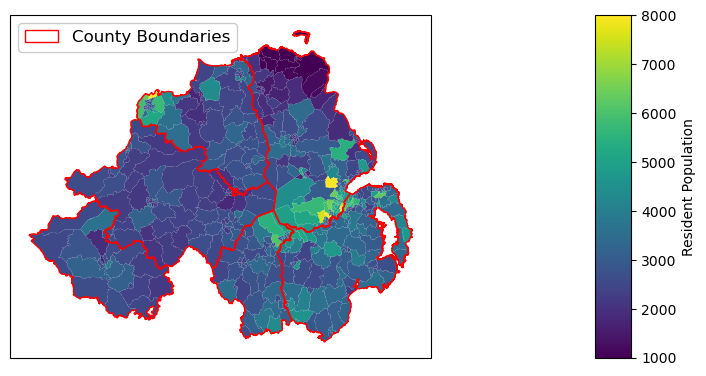

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
import matplotlib.patches as mpatches


# ---------------------------------------------------------------------------------------------------------------------
# in this section, write the script to load the data and complete the main part of the analysis.

counties = gpd.read_file('data_files/Counties.shp') # load the Counties shapefile
wards = gpd.read_file('data_files/NI_Wards.shp') # load the Counties shapefile

join = gpd.sjoin(counties, wards, how='inner', lsuffix='left', rsuffix='right') # perform the spatial join
join # show the joined table

# try to print the results to the screen using the format method demonstrated in the workbook

# load the necessary data here and transform to a UTM projection

# your analysis goes here...

# ---------------------------------------------------------------------------------------------------------------------
# below here, you may need to modify the script somewhat to create your map.
# create a crs using ccrs.UTM() that corresponds to our CRS
ni_utm = ccrs.UTM(29)

# create a figure of size 10x10 (representing the page size in inches
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw=dict(projection=ni_utm))

# add gridlines below
gridlines = ax.gridlines(draw_labels=True,
                         xlocs=[-8, -7.5, -7, -6.5, -6, -5.5],
                         ylocs=[54, 54.5, 55, 55.5])
gridlines.right_labels = False
gridlines.bottom_labels = False

# to make a nice colorbar that stays in line with our map, use these lines:
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1, axes_class=plt.Axes)

# plot the ward data into our axis, using gdf.plot()
ward_plot = wards.plot(column='Population', ax=ax, vmin=1000, vmax=8000, cmap='viridis',
                       legend=True, cax=cax, legend_kwds={'label': 'Resident Population'})

# add county outlines in red using ShapelyFeature
county_outlines = ShapelyFeature(counties['geometry'], ni_utm, edgecolor='r', facecolor='none')
ax.add_feature(county_outlines)

def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = [] # create an empty list
    for ii in range(len(labels)): # for each label and color pair that we're given, make an empty box to pass to our legend
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[ii % lc], edgecolor=edge, alpha=alpha))
    return handles

county_handles = generate_handles([''], ['none'], edge='r')

# add a legend in the upper left-hand corner
ax.legend(county_handles, ['County Boundaries'], fontsize=12, loc='upper left', framealpha=1)

# save the figure
fig.savefig('sample_map.png', dpi=300, bbox_inches='tight')


In [2]:
wards.head() # show the first five rows of the table

,Ward Code,Ward,Population,geometry
0,95DD05,Ballykeel,1739,"POLYGON ((-6.25014 54.85879, -6.25015 54.85875..."
1,95DD06,Ballyloughan,2588,"POLYGON ((-6.28913 54.86946, -6.28917 54.86949..."
2,95DD03,Ardeevin,3503,"POLYGON ((-6.29527 54.84752, -6.29527 54.84751..."
3,95DD04,Ballee,1926,"POLYGON ((-6.26087 54.84528, -6.26096 54.84524..."
4,95DD09,Craigywarren,2590,"POLYGON ((-6.24807 54.89652, -6.24819 54.89645..."


In [3]:
join = gpd.sjoin(counties, wards, how='inner', lsuffix='left', rsuffix='right') # perform the spatial join
join # show the joined table

,COUNTY_ID,CountyName,Area_SqKM,OBJECTID,geometry,index_right,Ward Code,Ward,Population
0,6,TYRONE,3265.796622,1,"POLYGON ((-7.38177 54.94208, -7.38170 54.94201...",126,95CC13,Killylea,2474
0,6,TYRONE,3265.796622,1,"POLYGON ((-7.38177 54.94208, -7.38170 54.94201...",118,95CC02,Ballymartrim,2725
0,6,TYRONE,3265.796622,1,"POLYGON ((-7.38177 54.94208, -7.38170 54.94201...",541,95OO09,Clogher,2252
0,6,TYRONE,3265.796622,1,"POLYGON ((-7.38177 54.94208, -7.38170 54.94201...",544,95OO07,Caledon,2510
0,6,TYRONE,3265.796622,1,"POLYGON ((-7.38177 54.94208, -7.38170 54.94201...",539,95OO03,Aughnacloy,2651
...,...,...,...,...,...,...,...,...,...
5,3,DOWN,2491.238606,6,"MULTIPOLYGON (((-6.07945 54.04737, -6.07950 54...",242,95XX16,Groomsport,3005
5,3,DOWN,2491.238606,6,"MULTIPOLYGON (((-6.07945 54.04737, -6.07950 54...",237,95XX02,Ballyholme,2652
5,3,DOWN,2491.238606,6,"MULTIPOLYGON (((-6.07945 54.04737, -6.07950 54...",51,95GG39,Shaftesbury,7214
5,3,DOWN,2491.238606,6,"MULTIPOLYGON (((-6.07945 54.04737, -6.07950 54...",293,95LL21,Parklake,3983


In [4]:
# Group by county and sum up the population within each county
county_population = join.groupby('CountyName')['Population'].sum()

# Display the total population for each county
print(county_population)

CountyName
ANTRIM         718369
ARMAGH         232505
DOWN           639915
FERMANAGH       75906
LONDONDERRY    293296
TYRONE         253986
Name: Population, dtype: int64
